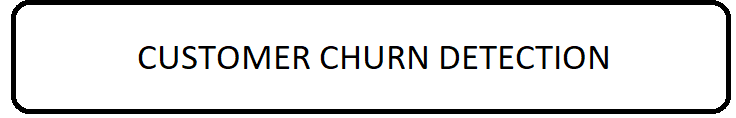

## Importing Libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

## About Dataset

### Customer Churn Analysis
- Customer churn, also known as customer attrition, is when a customer essentially stops being a customer- ie, they choose to stop using your products or services. Customer Churn is one of the most important and challenging problems for businesses such as Credit Card companies, cable service providers, SASS and telecommunication companies worldwide.

- What is Churn Analysis?

- Customer churn analysis is the process of using your churn data to understand:

- Which customers are leaving?

- Why are they leaving?

- What can you do to reduce churn?

- As you may have guessed, churn analysis goes beyond just looking at your customer churn rate. It’s about discovering the underlying causes behind your numbers.

- Ultimately, successful churn analysis will give you the valuable insights you need to start reducing your business’s customer attrition rate.

## Loading and Reading Dataset

In [52]:
df=pd.read_csv('Churn_Modelling.csv')

In [53]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


 ## Information about dataset

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Dropping insignificant feature

In [55]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [56]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## Finding Unique values

In [58]:
for col in df.columns:
 print('='*75)
 print(" "*25,col)
 print('='*75)
 print(df[col].unique())

                          CreditScore
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 

## Descriptive statistics(Univariate analysis)

In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


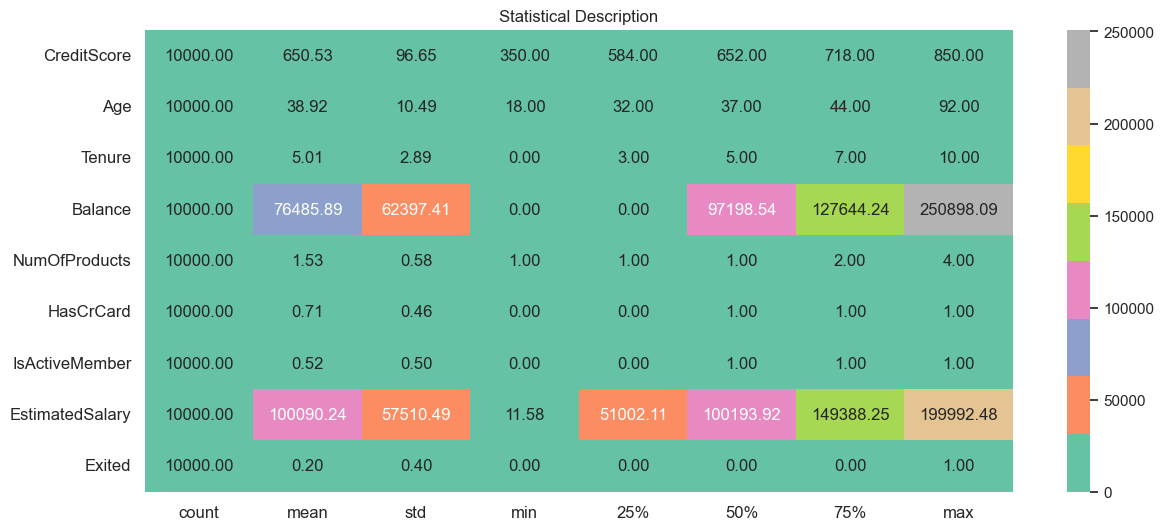

In [60]:
def descriptive_stats(dt):
    desc = dt.describe().round(2).T
    desc_df = pd.DataFrame(index=dt.columns,columns=desc.columns,data=desc) 
    plt.figure(figsize=(14,6))
    sns.heatmap(desc, annot=True, cmap='Set2', fmt=".2f")
    plt.xticks(size = 12)
    plt.yticks(size = 12, rotation = 0)
    plt.title('Statistical Description')
    plt.show()
descriptive_stats(df)

## PREPROCESSING:

## 🎯 Checking null values

In [61]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### No null values

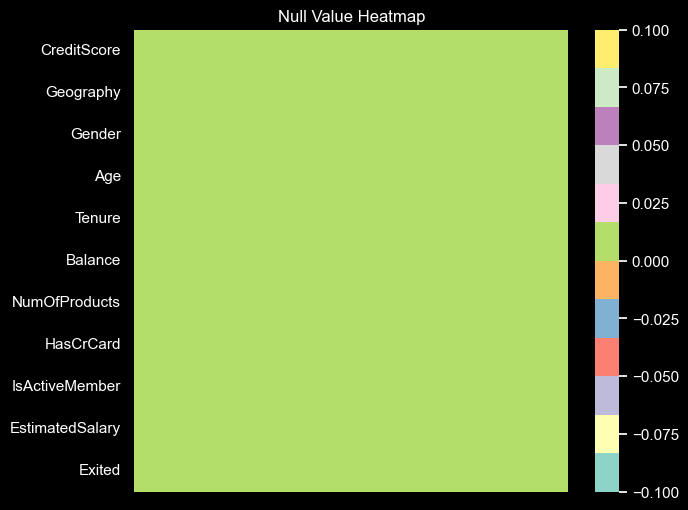

In [62]:
# Create a heatmap of null values
plt.style.use('dark_background')
plt.figure(figsize=(7, 6))
sns.heatmap(df.isnull().T, cmap='Set3', cbar=True, xticklabels= False)
plt.title('Null Value Heatmap')
# Display the plot
plt.show()

## 🎯 ENCODING:

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [64]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [65]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [66]:
##One hot encoding
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


## Checking outliers

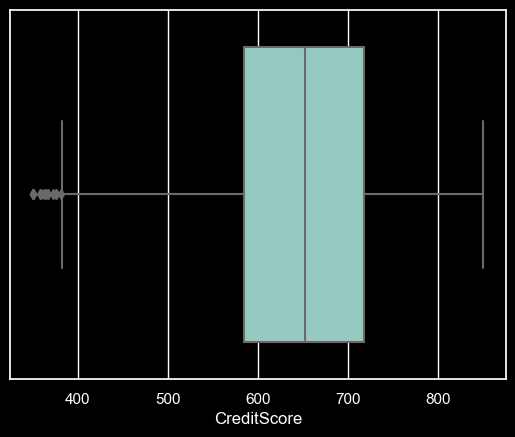

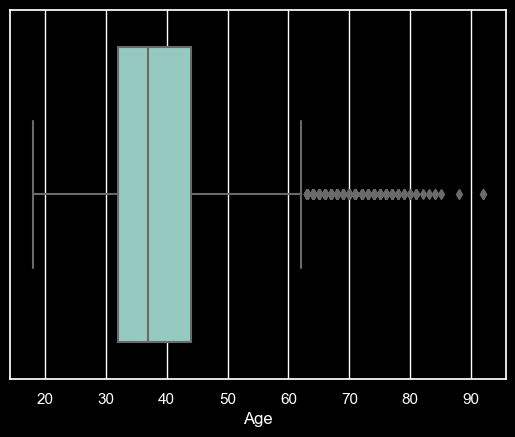

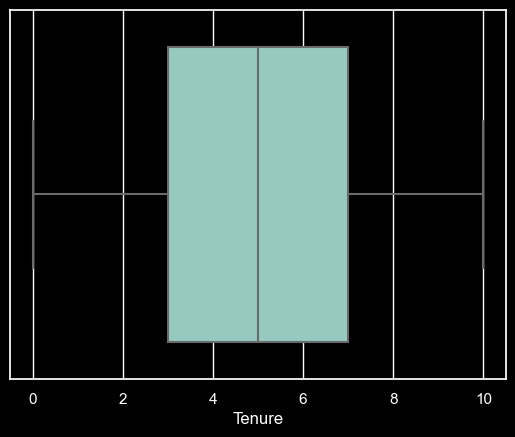

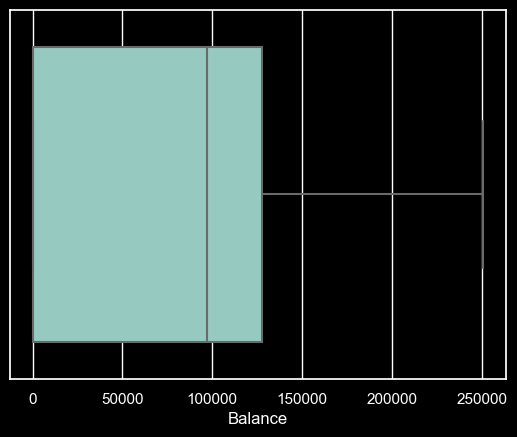

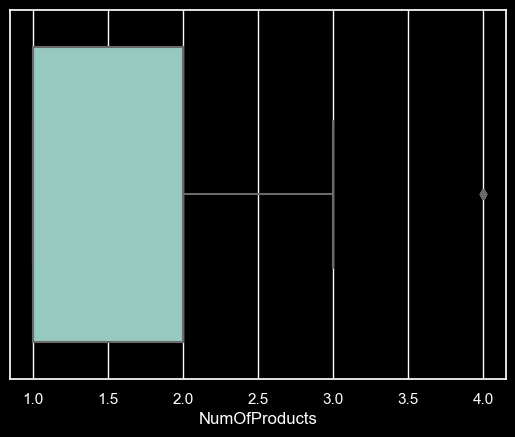

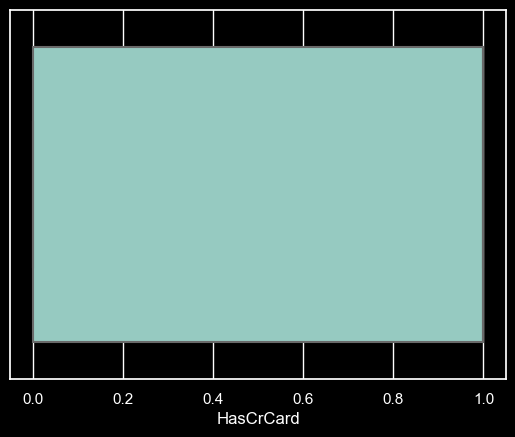

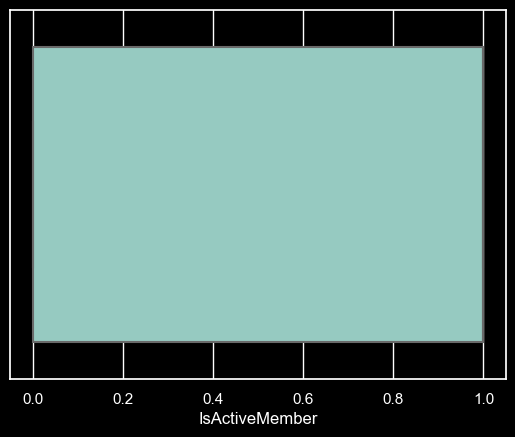

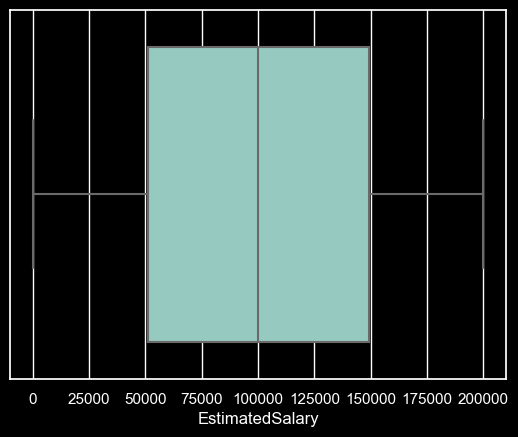

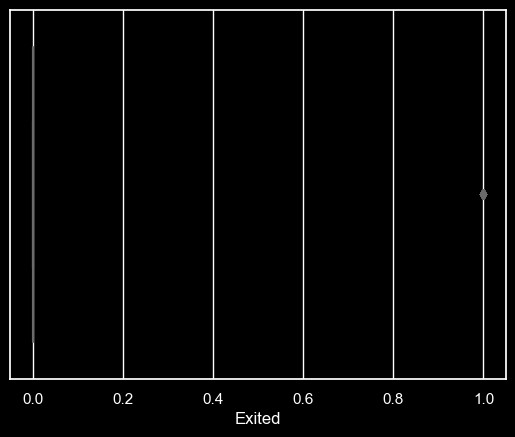

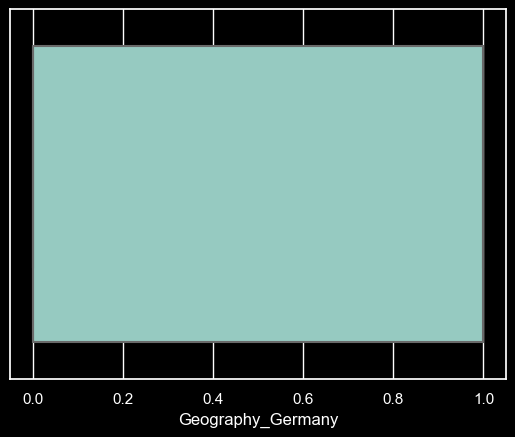

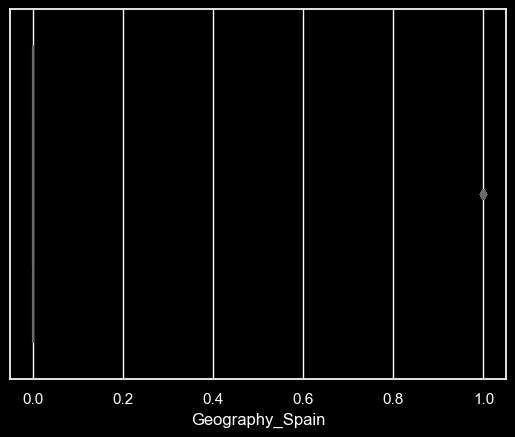

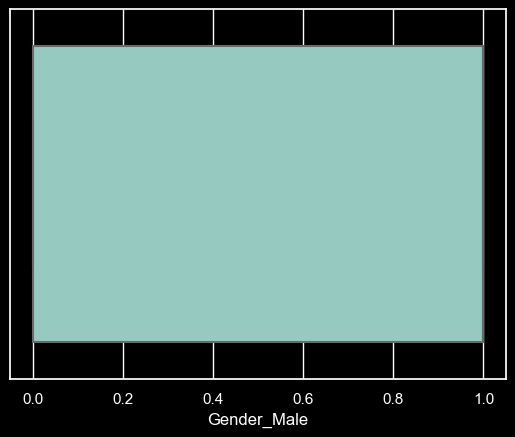

In [68]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

### Each value is imp so don't handle outliers

## Split data into dv and idv

In [69]:
x=df.drop('Exited',axis=1)
y=df[['Exited']]

In [70]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(x)

In [71]:
x_sc

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ..., -0.57873591,
         1.74273971, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57873591,
        -0.57380915, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  1.72790383,
        -0.57380915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57873591,
        -0.57380915, -1.09598752]])

## Imbalance data check

In [72]:
df['Exited'].value_counts()     ##imbalance data

0    7963
1    2037
Name: Exited, dtype: int64

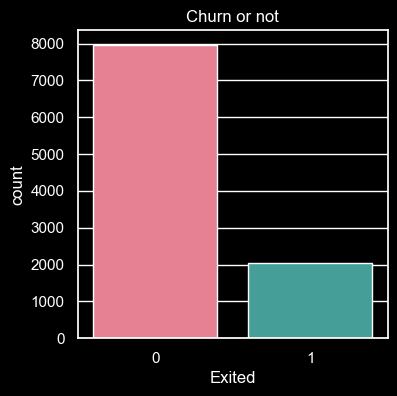

In [73]:
plt.style.use('dark_background')
plt.figure(figsize = (4,4))
ax = sns.countplot(x= df.Exited , data= df, palette ='husl')
ax.set_title('Churn or not')
plt.show()

In [74]:
import imblearn
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x_sc,y)

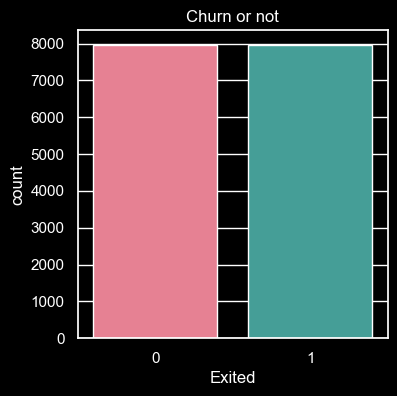

In [75]:
plt.style.use('dark_background')
plt.figure(figsize = (4,4))
ax = sns.countplot(x= y_smote.Exited , data= y_smote, palette ='husl')
ax.set_title('Churn or not')
plt.show()

## Bivariate analysis of dependent variables:

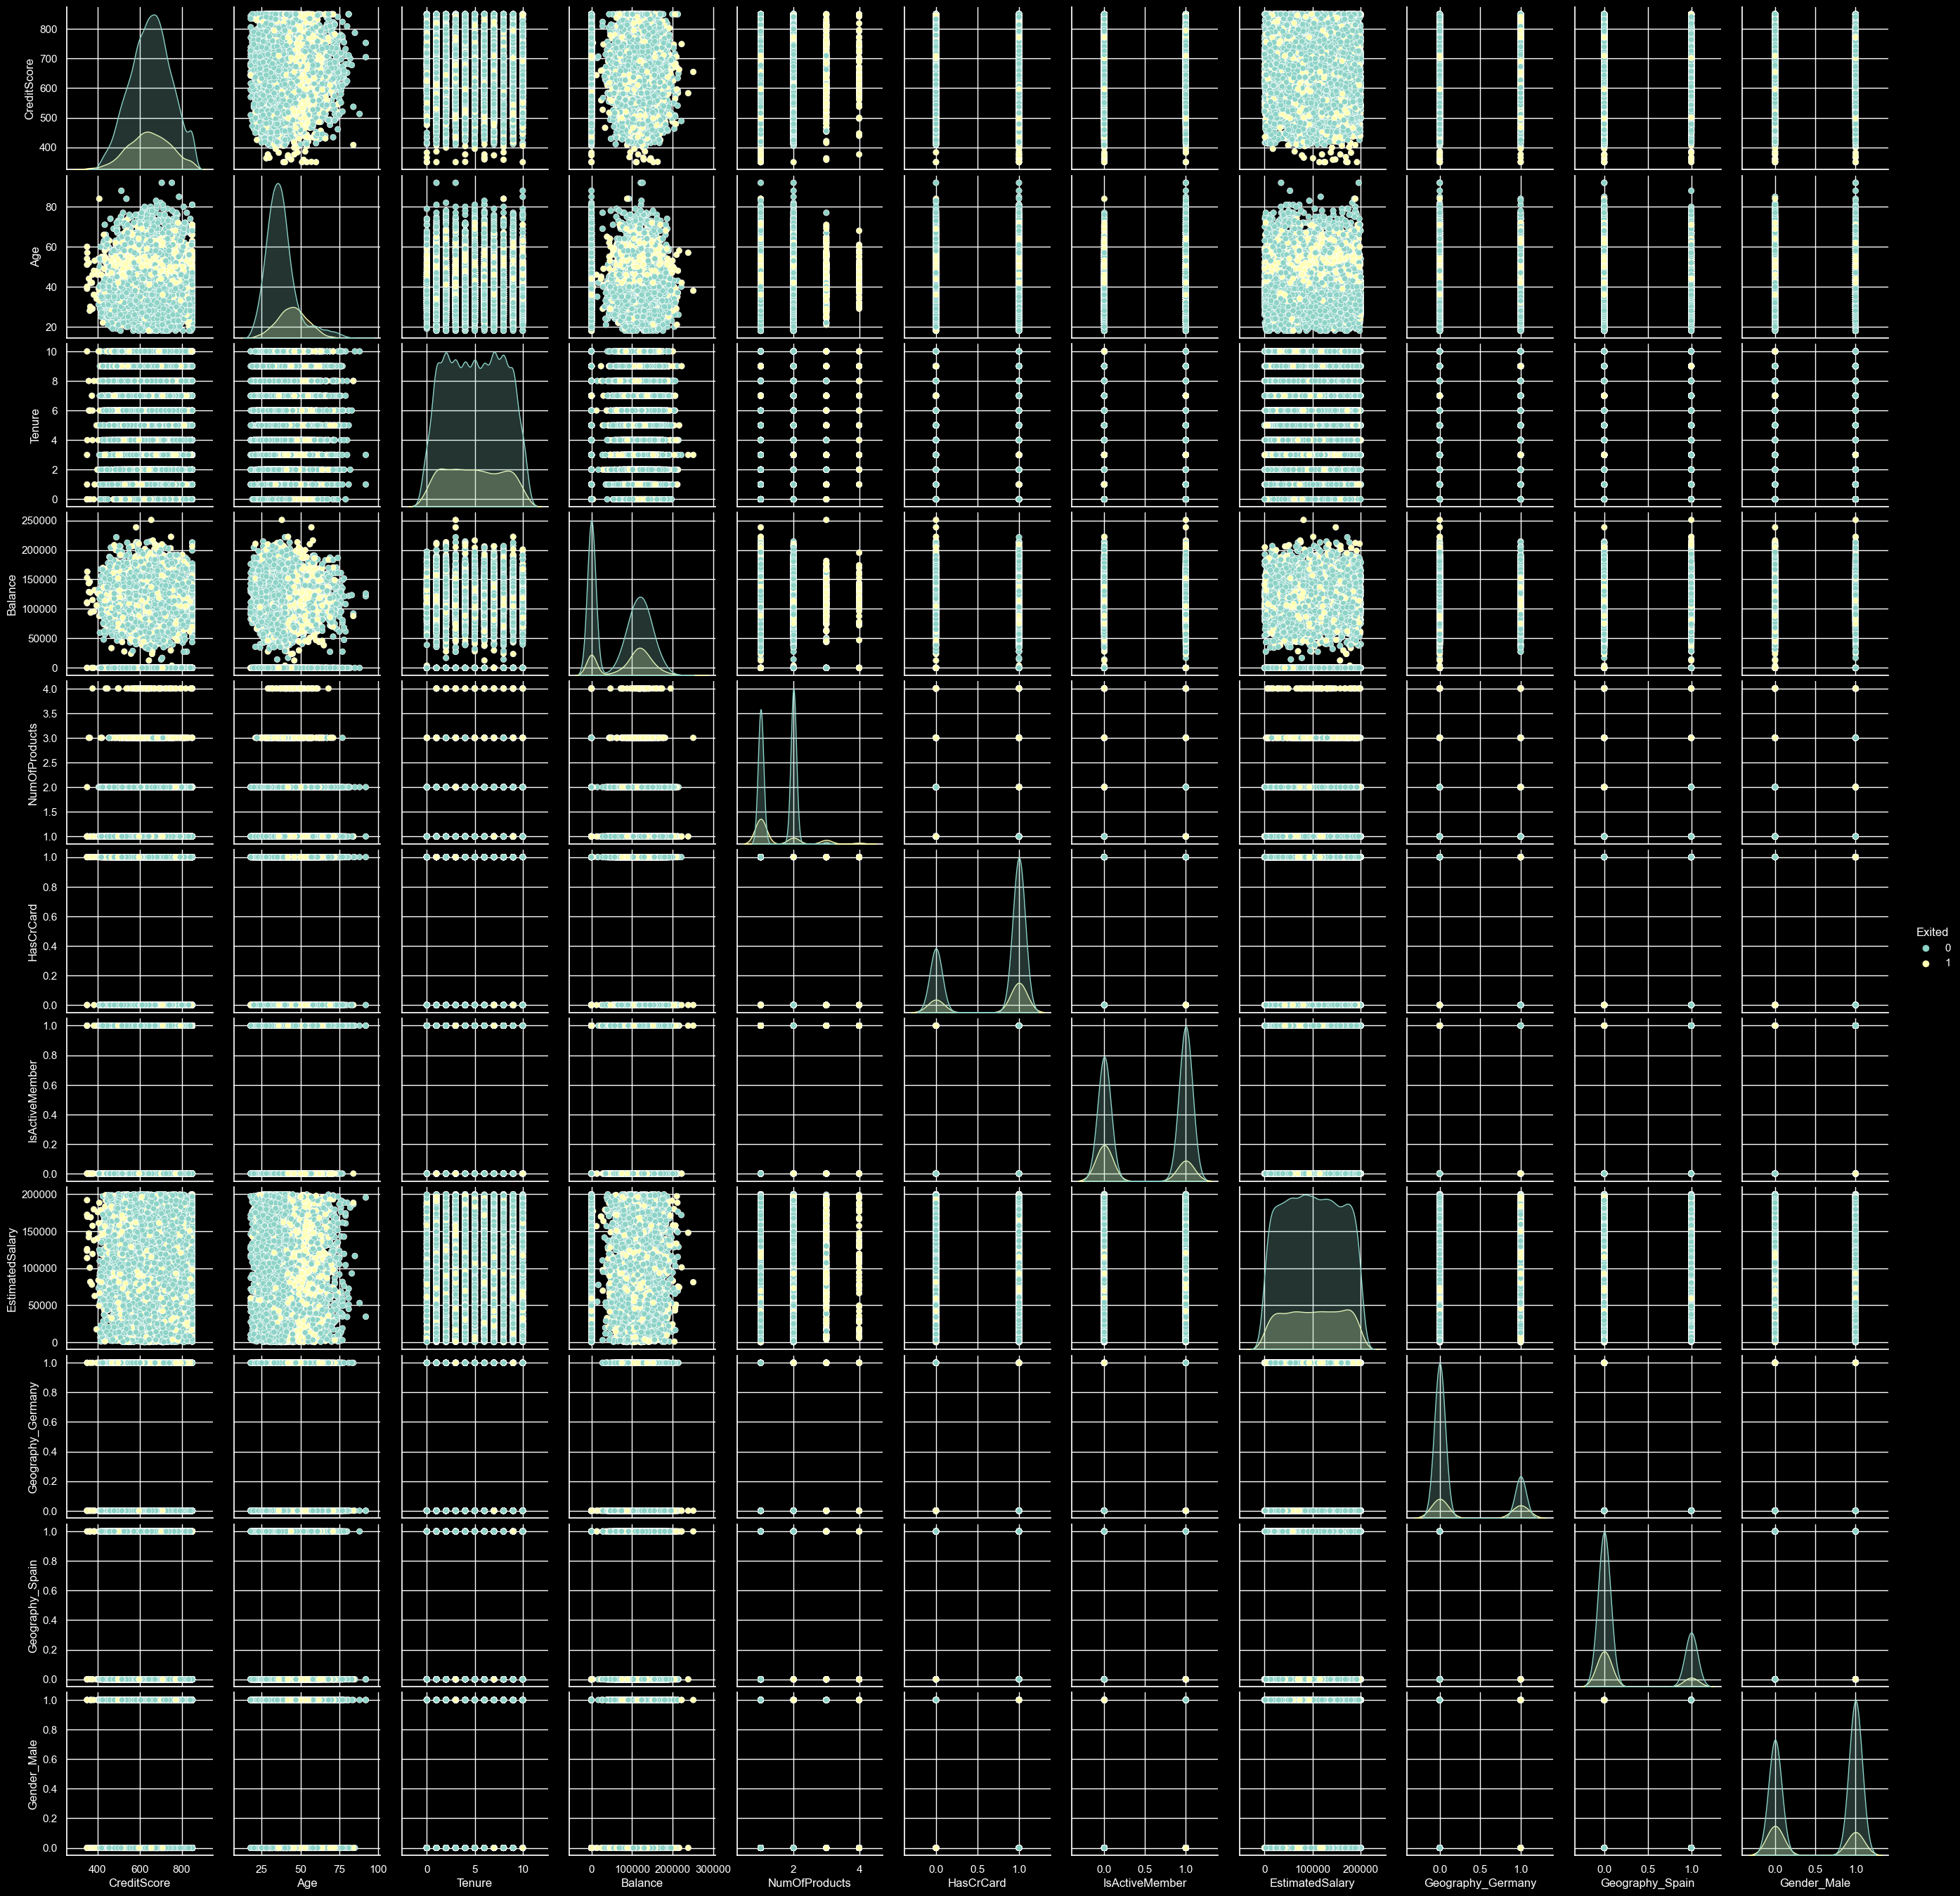

In [76]:
sns.pairplot(df,hue='Exited')

## Correlation between Independent Features

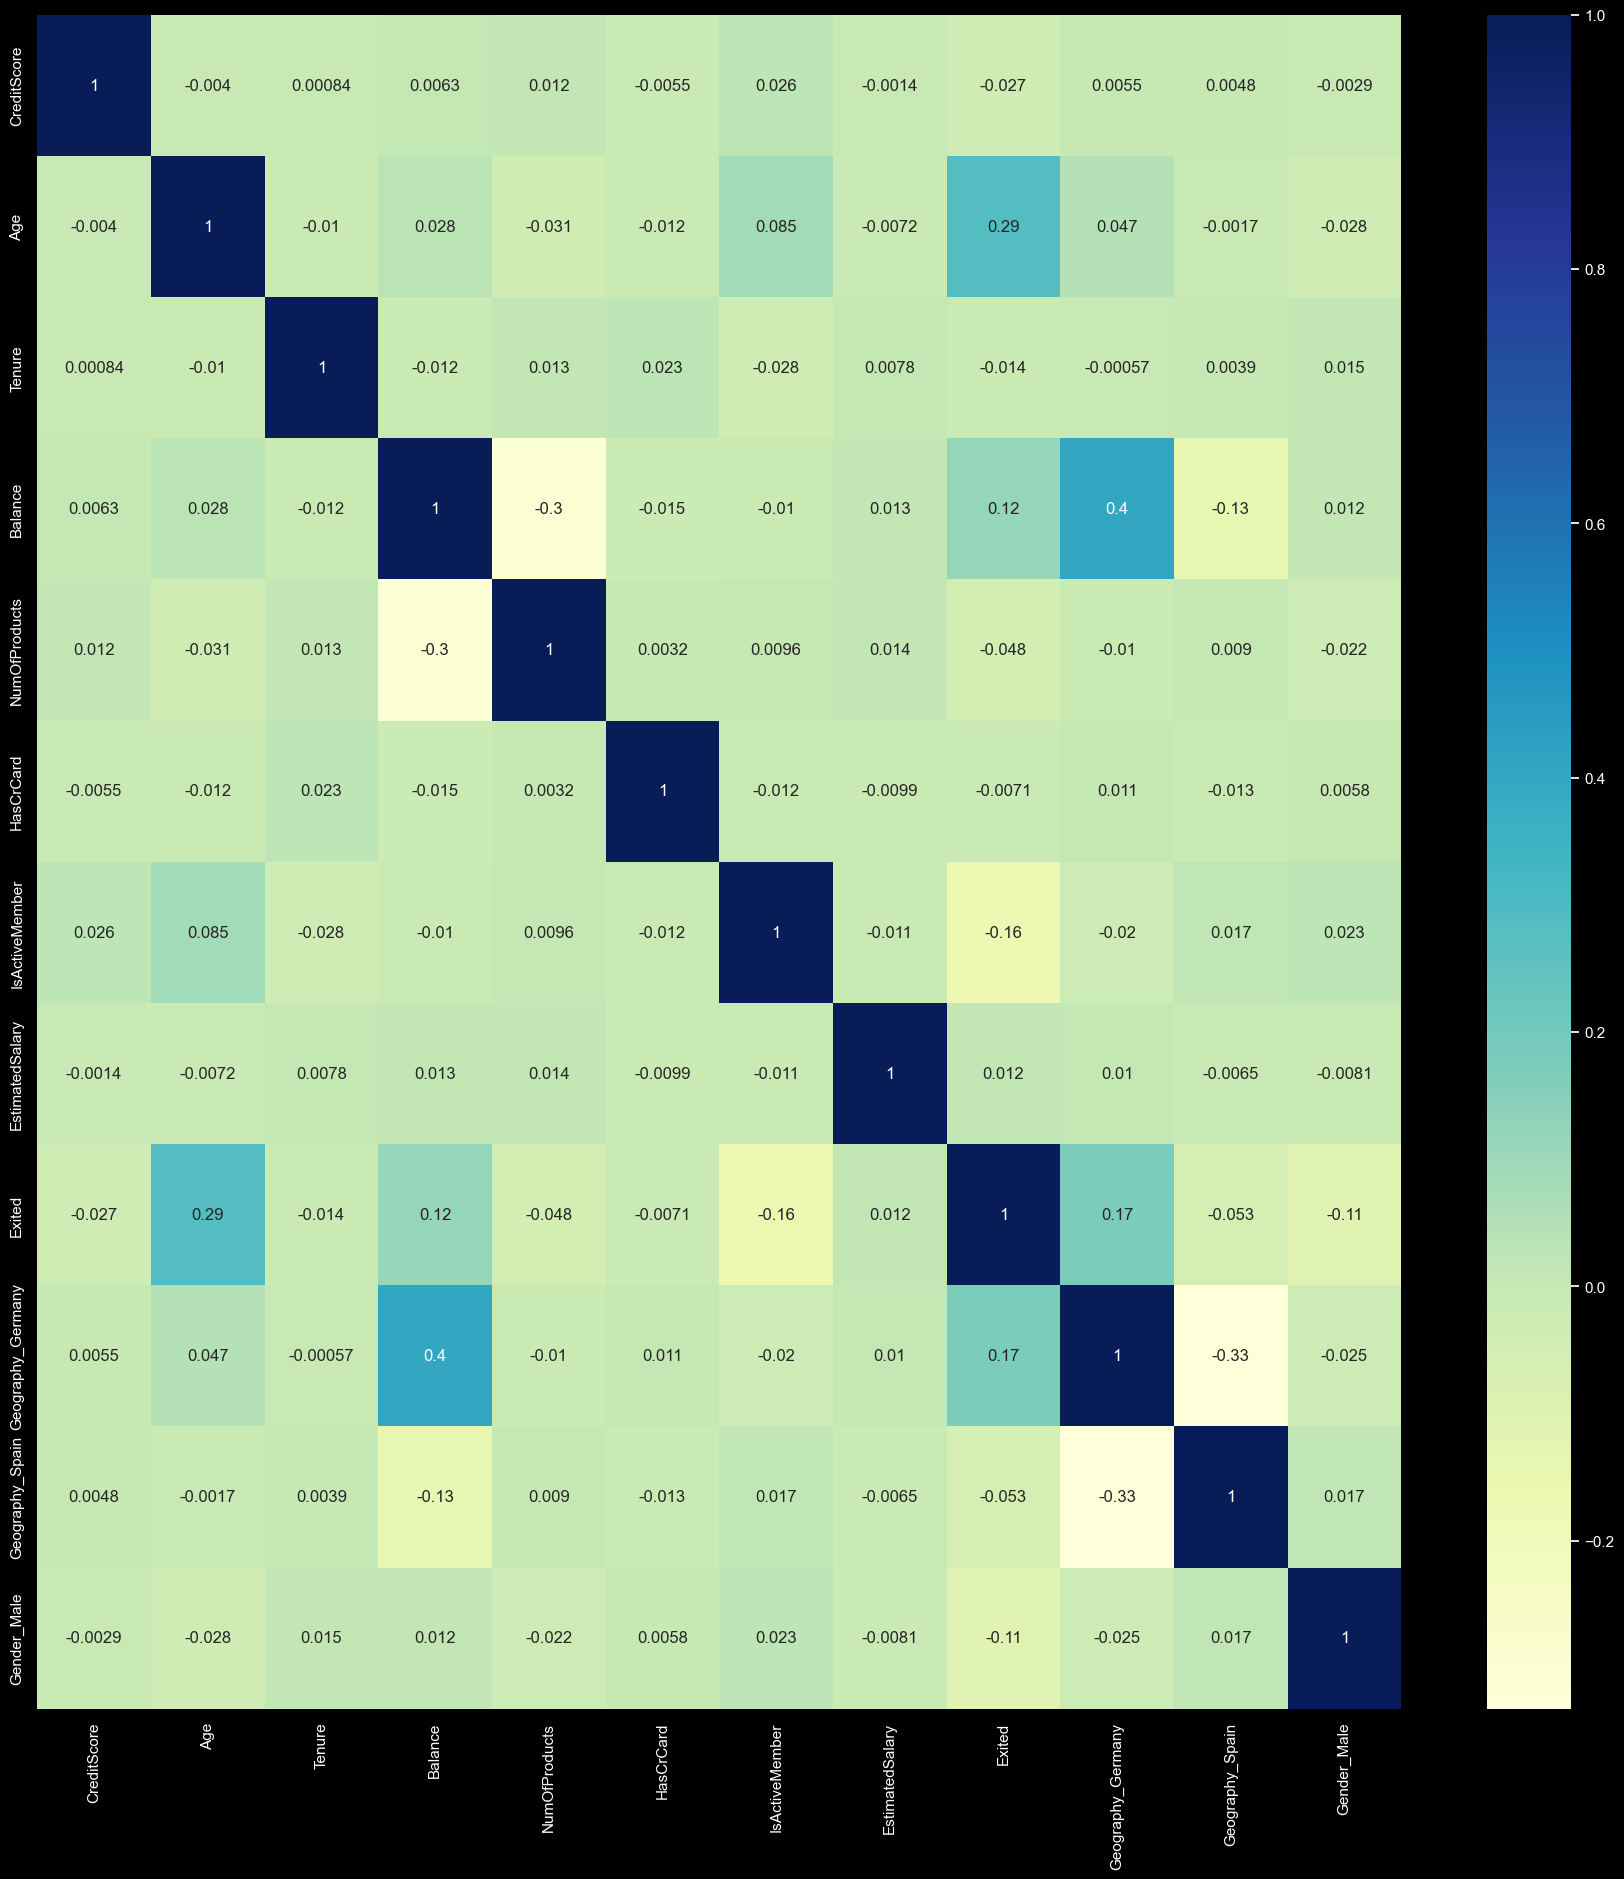

In [77]:
plt.figure(figsize=(22,22))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

## splitting the data into train and test

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size=0.2,random_state=1,stratify=y_smote)

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [80]:
#logistic
logistic=LogisticRegression()

In [81]:
#Randomforest
rf=RandomForestClassifier()

In [82]:
#Boosting
gdb=GradientBoostingClassifier()

In [83]:
list1=[(logistic,'logistic',1),(rf,'randomforest',2),(gdb,'GradientBoost',3)]

In [84]:
for model,model_name,i in list1:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    print('===================================================================')
    print(f'Cross validation of {model_name}')
    Train_acc=cross_val_score(model,x_train,y_train,cv=10).mean()
    Test_acc=cross_val_score(model,x_test,y_test,cv=10).mean()
    varience=abs(Train_acc-Test_acc)
    print('Train accuracy:',Train_acc)
    print('Test accuracy:',Test_acc)
    print('varience:',varience)
    if varience>10 :
        print(f'Overfitting {model_name}')   

Cross validation of logistic
Train accuracy: 0.71287284144427
Test accuracy: 0.7134549791999368
varience: 0.000582137755666845
Cross validation of randomforest
Train accuracy: 0.8963893249607535
Test accuracy: 0.8389907533368822
varience: 0.0573985716238713
Cross validation of GradientBoost
Train accuracy: 0.866326530612245
Test accuracy: 0.8418179846611856
varience: 0.024508545951059335


In [85]:
#classification report
from sklearn.metrics import classification_report
for model,model_name,i in list1:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    print('===================================================================')
    print(f'Classification report of {model_name}')
    print('====================================================================')
    Train_cvr=classification_report(y_train,y_pred_train)
    Test_cvr=classification_report(y_test,y_pred_test)
    print('Train classification report:',Train_cvr)
    print('===================================================================')
    print('Test classification report:',Test_cvr)

Classification report of logistic
Train classification report:               precision    recall  f1-score   support

           0       0.71      0.72      0.72      6370
           1       0.72      0.70      0.71      6370

    accuracy                           0.71     12740
   macro avg       0.71      0.71      0.71     12740
weighted avg       0.71      0.71      0.71     12740

Test classification report:               precision    recall  f1-score   support

           0       0.71      0.72      0.72      1593
           1       0.72      0.71      0.71      1593

    accuracy                           0.72      3186
   macro avg       0.72      0.72      0.72      3186
weighted avg       0.72      0.72      0.72      3186

Classification report of randomforest
Train classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      6370

    accuracy            

Confusion matrix of logistic


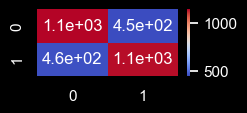

Confusion matrix of randomforest


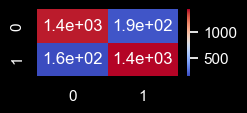

Confusion matrix of GradientBoost


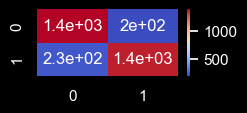

In [86]:
#Confusion matrix:
from sklearn.metrics import confusion_matrix
for model,model_name,i in list1:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    cm=confusion_matrix(y_test,y_pred_test)
    print(f'Confusion matrix of {model_name}')
    plt.figure(figsize=(5,5))
    plt.subplot(5,2,i)
    sns.heatmap(cm,annot=True,cmap='coolwarm')
    plt.show()

In [87]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

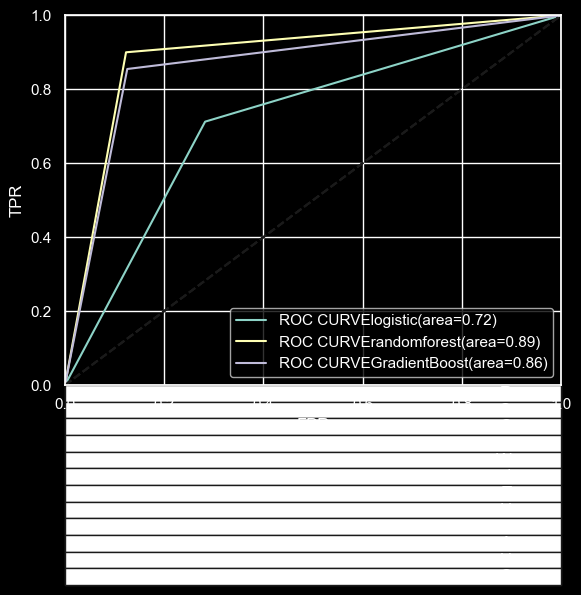

In [88]:
for model,model_name,i in list1:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    roc_auc=roc_auc_score(y_test,y_pred_test)
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
    plt.plot(fpr,tpr,label=f'ROC CURVE{model_name}(area=%0.2f)'%roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.table('ROC WITH AUC')
    plt.legend(loc='lower right')
plt.show()

In [89]:
from sklearn.metrics import accuracy_score

In [90]:
acc_list=[]
for model,model_name,i in list1:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    test_acc=accuracy_score(y_test,y_pred_test)
    acc_list.append(test_acc)

In [91]:
model=['logistic','randomforest','GradientBoost']

In [92]:
metrics_df=pd.DataFrame({'model_name':model,'Accuracy':acc_list})

In [93]:
metrics_df

,model_name,Accuracy
0,logistic,0.715003
1,randomforest,0.892969
2,GradientBoost,0.864721


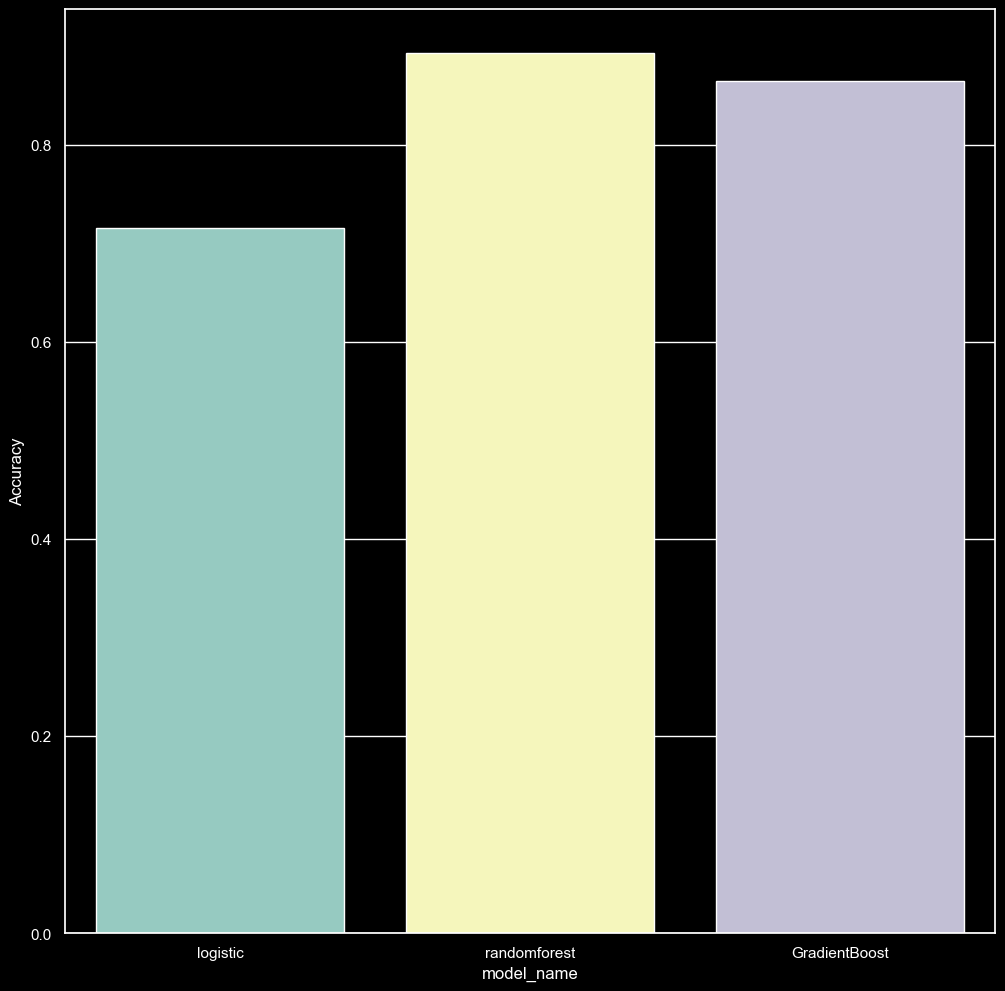

In [94]:
plt.figure(figsize=(12,12))
sns.barplot(x='model_name',y='Accuracy',data=metrics_df)
plt.show()

## 🎯Summary:

### We can observe that all models predicted and gave best accuracy among all of them GRADIENT BOOSTING gave best train accuracy of 87% and test accuracy of 85.8% with 'LITTLE VARIENCE'

#### BEST MODEL: GRADIENT BOOSTING CLASSIFER